In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

### Variables de entrada
calidad : Calidad de la comida
servicio: Calidad del servicio

### Variable de salida
propina: Porcentaje de la cuenta como propina

In [2]:
# Generaciones de las variables universales
# * Calidad y servicio en rangos subjetivos [0, 10]. Las dos son funciones de Entrada.
# * Propina tiene un rango de [0, 25] en unidades de puntos porcentuales. Es una función de Salida.
x_calidad = np.arange(0, 11, 1)
x_servicio = np.arange(0, 11, 1)
x_propina = np.arange(0, 26, 1)

In [3]:
# Generar funciones de membresia difusas
calidad_baja = fuzz.trimf(x_calidad, [0, 0, 5])
calidad_media = fuzz.trimf(x_calidad, [0, 5, 10])
calidad_alta = fuzz.trimf(x_calidad, [5, 10, 10])
servicio_bajo = fuzz.trimf(x_servicio, [0, 0, 5])
servicio_medio = fuzz.trimf(x_servicio, [0, 5, 10])
servicio_alto = fuzz.trimf(x_servicio, [5, 10, 10])
propina_baja = fuzz.trimf(x_propina, [0, 0, 13])
propina_media = fuzz.trimf(x_propina, [0, 13, 25])
propina_alta = fuzz.trimf(x_propina, [13, 25, 25])

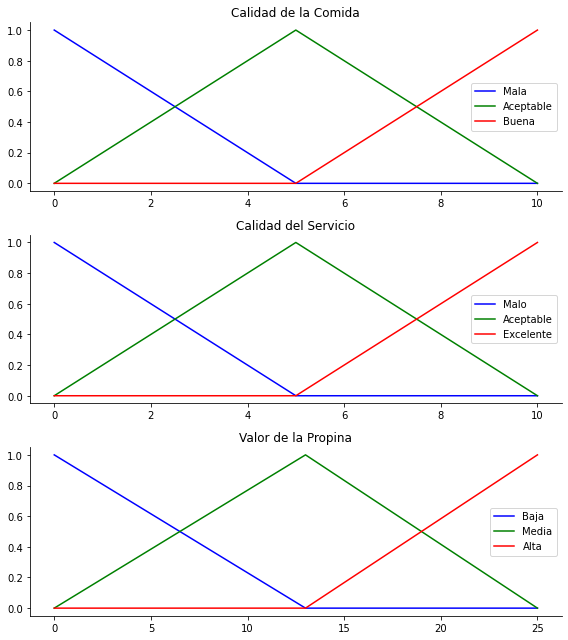

In [7]:
# Visualizacion del universo y las funciones de membresia
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_calidad, calidad_baja, 'b', linewidth=1.5, label='Mala')
ax0.plot(x_calidad, calidad_media, 'g', linewidth=1.5, label='Aceptable')
ax0.plot(x_calidad, calidad_alta, 'r', linewidth=1.5, label='Buena')
ax0.set_title('Calidad de la Comida')
ax0.legend()

ax1.plot(x_servicio, servicio_bajo, 'b', linewidth=1.5, label='Malo')
ax1.plot(x_servicio, servicio_medio, 'g', linewidth=1.5, label='Aceptable')
ax1.plot(x_servicio, servicio_alto, 'r', linewidth=1.5, label='Excelente')
ax1.set_title('Calidad del Servicio')
ax1.legend()

ax2.plot(x_propina, propina_baja, 'b', linewidth=1.5, label='Baja')
ax2.plot(x_propina, propina_media, 'g', linewidth=1.5, label='Media')
ax2.plot(x_propina, propina_alta, 'r', linewidth=1.5, label='Alta')
ax2.set_title('Valor de la Propina')
ax2.legend()

# Ocultar los ejes superior/derecho

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

## Reglas difusas
Definimos la relación difusa de las variables de entrada y salidad.
Las reglas serán las siguientes:
1. Si la comida es **mala** *O* el servicio es **malo**, la propina será **baja**.
2. Si el servicio es **aceptable**, entonces la propina será **media**.
3. Si la comida es **buena** *O* el servicio es **excelente**, entonces la propina será **alta**.

El cómo se definen las reglas es la parte más importante de un sistema de lógica difusa.


## Aplicación de las reglas
Se da como ejemplo una calidad de la comida de **6.5** y un servicio de **9.8**.

In [8]:
calidad = 6.5
servicio = 9.8
# Los sistemas de lógica difusa no funcionan con numeros, sino con valores difusos para esto usamos el metodo fuzz.interp_membership
# para interpolar el valor difuso

calidad_level_bajo = fuzz.interp_membership(x_calidad, calidad_baja, calidad)
calidad_level_medio = fuzz.interp_membership(x_calidad, calidad_media, calidad)
calidad_level_alto = fuzz.interp_membership(x_calidad, calidad_alta, calidad)

servicio_level_bajo = fuzz.interp_membership(x_servicio, servicio_bajo, servicio)
servicio_level_medio = fuzz.interp_membership(x_servicio, servicio_medio, servicio)
servicio_level_alto = fuzz.interp_membership(x_servicio, servicio_alto, servicio)

# Ahora tomamos nuestras reglas y las aplicamos. La regla 1 dice que si la comida o el servicio fueron malos, entonces la propina será baja.
# El operador OR significa que tomamos el máximo de estos dos.
active_rule1 = np.fmax(calidad_level_bajo, servicio_level_bajo)

# Ahora aplicamos esto recortando la parte superior de la correspondiente función de membresía con `np.fmin`
tip_activation_baja = np.fmin(active_rule1, propina_baja)  # eliminado por completo a 0

# Para la regla 2, conectamos un servicio aceptable con una propina media.
tip_activation_media = np.fmin(servicio_level_medio, propina_media)

# Para la regla 3, si la comida fue buena o el servicio fue excelente, entonces la propina será alta.
active_rule3 = np.fmax(calidad_level_alto, servicio_level_alto)
tip_activation_alta = np.fmin(active_rule3, propina_alta)

Text(0.5, 1.0, 'Actividad de membresía de salida')

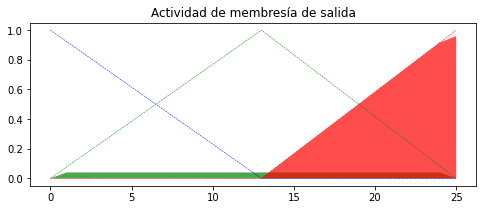

In [9]:
# Visualización
tip0 = np.zeros_like(x_propina)
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_propina, tip0, tip_activation_baja, facecolor='b', alpha=0.7)
ax0.plot(x_propina, propina_baja, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_propina, tip0, tip_activation_media, facecolor='g', alpha=0.7)
ax0.plot(x_propina, propina_media, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_propina, tip0, tip_activation_alta, facecolor='r', alpha=0.7)
ax0.plot(x_propina, propina_alta, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Actividad de membresía de salida')


## Agregación de reglas
Una vez conocida la actividad de cada función de pertenencia de salida, se deben combinar todas las funciones de pertenencia de salida. Normalmente, esto se hace utilizando un operador máximo. Este paso también se conoce como agregación.

## Defuzificación
Finalmente, para obtener una respuesta del mundo real, volvemos a la lógica nítida del mundo de las funciones de membresia difusas. Se pueden utilizar diferentes métodos para esto, pero en este caso se usará el método del centroide.

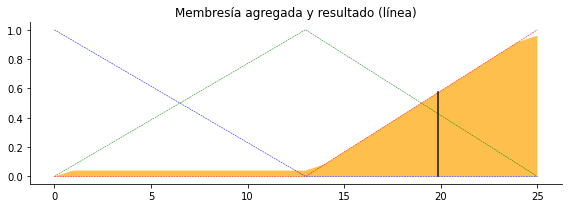

In [10]:
# Agregación de las tres funciones de membresia de salida juntas
agregacion = np.fmax(tip_activation_baja, np.fmax(tip_activation_media, tip_activation_alta))

# Calculo del resultado difuso
propina = fuzz.defuzz(x_propina, agregacion, 'centroid') # Resultado final de la propina

# Visualización
tip_activation = fuzz.interp_membership(x_propina, agregacion, propina)
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_propina, propina_baja, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_propina, propina_media, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_propina, propina_alta, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_propina, tip0, agregacion, facecolor='Orange', alpha=0.7)
ax0.plot([propina, propina], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Membresía agregada y resultado (línea)')

# Ocultar los ejes superior/derecho
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()


In [11]:
propina

19.86871794871795